In [246]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.cm as cm
from numpy.lib.scimath import sqrt
from matplotlib.colors import ListedColormap

In [281]:
def calculate_intersection(m, b, x0, y0, r):
    disc = sqrt(-b**2 + r**2 +m**2 * r**2 - 2*b*m*x0 - m**2 * x0**2 + 2*b*y0 + 2*m*x0*y0 - y0**2)
    add = -b*m+x0+m*y0
    fact = np.power(1.0+m**2,-1.0)
    root1 = fact*(add+disc)
    root2 = fact*(add-disc)
    return (root1, m*root1 + b, root2, m*root2 + b)
def calculate_normal(x, y, x0, y0, r):
    m = (y-y0)/(x-x0)
    b = y0 - m*x0
    return m, b
def angle_between(m1,m2):
    theta = np.arctan((m2-m1)/(1+m1*m2))
    return theta
def snells(theta, n1, n2):
    return np.arcsin(n1*np.sin(theta)/n2)
def new_slope(m, theta):
    return (np.tan(theta) + m)/(1-m*np.tan(theta))
def solve_for_line(m,x0,y0):
    b = y0 - m*x0
    return m, b
def middle_line(mincident,x2,y2,x0,y0,r,n=1.43):
    mnorm,bnrom = calculate_normal(x2,y2,x0,y0,r)
    theta = angle_between(mincident,mnorm)
    thetaprime = snells(theta, 1,n)
    nslope = new_slope(mnorm,-thetaprime)
    m2,b2 = solve_for_line(nslope, x2,y2)
    x12,y12,x22,y22 = calculate_intersection(m2, b2, x0, y0, r)
    return m2, b2, x12, y12, x22, y22
def end_line(mincident,x2,y2,x0,y0,r,n=1.43):
    mnorm,bnrom = calculate_normal(x2,y2,x0,y0,r)
    theta = angle_between(mincident,mnorm)
    thetaprime = snells(theta, n,1)
    nslope = new_slope(mnorm,-thetaprime)
    m2,b2 = solve_for_line(nslope, x2,y2)
    return m2, b2
def gaussian(x, mu=0, sigma=1):
    return np.power(np.sqrt(2*np.pi*sigma**2),-1/2)*np.exp(-np.power((x-mu)/sigma,2)*1/2)
def color(b):
    return gaussian(b)*1.5

[]

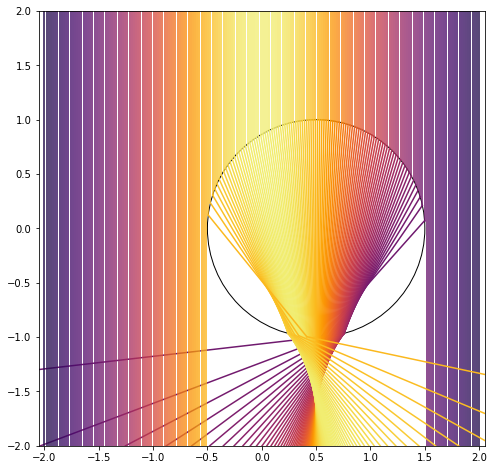

In [283]:
fig, ax = plt.subplots(figsize=(8,8))
N=200
m=0; b=0; x0=0; y0=.5; r=1

cmap = cm.get_cmap('inferno')

# Get the colormap colors
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = 1

# Create new colormap
my_cmap = ListedColormap(my_cmap)


ax.set_aspect('equal', 'datalim')

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

blist = np.linspace(2,-2,N)
for b in blist:
    c = my_cmap(color(b))
    x1,y1,x2,y2 = calculate_intersection(m, b, x0, y0, r)
    
    if np.isreal(x2):
        x_first = np.linspace(-2,x2)
        ax.plot(m*x_first+b, -x_first, c = c)


        m2, b2, x12,y12,x22,y22 = middle_line(m, x2, y2, x0, y0, r)

        ax.plot([y12,y22],[-x12,-x22], c = c)

        m3, b3 = end_line(m2, x12, y12, x0, y0, r)
        x_last = np.linspace(x12, 2)
        ax.plot(m3*x_last+b3, -x_last, c = c)
    
    else:
        x_first = np.linspace(-2,2)
        ax.plot(m*x_first+b, -x_first, c = c)

circle = plt.Circle((y0, -x0), r, color='k',fill=False)    
ax.add_artist(circle)    
    
# fig.colorbar()

ax.plot()
